# Activity 5 - stellar spectra

In this activity, we're going to look at spectra of some real stars and of models, compare stars of different spectral types, and finding the temperatures of our mystery stars.

The zip file for this activity has the model spectra for different spectral type B-M, and the observed spectra for 5 real stars. The files are .csv (tabular) files with two columns:

- Wavelength -- units of nm

- Normalized Flux -- the fluxes have been "continuum normalized", meaning that the overall blackbody shape has been divided out. So the flux values vary from 0-1 in value, rather than normal erg/cm2/s/nm units.

- Error -- the uncertainty in the normalized flux values (for observed stars only)

# Part 1 - Model spectra


## Step 1

Let's start with the B star.  Below is the basic syntax to read a data file into a table using the *astropy.io.ascii.read()* function:

In [ ]:
# always start by importing useful packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib inline

In [ ]:
Bstar = ascii.read('Bstar.csv')
print(Bstar)

wavelength  flux
---------- -----
     380.0 0.483
     380.1 0.569
     380.2 0.649
     380.3  0.72
     380.4 0.782
     380.5 0.832
     380.6 0.878
     380.7  0.91
     380.8 0.943
     380.9 0.966
       ...   ...
     498.9 0.999
     499.0 0.992
     499.1 0.986
     499.2 0.989
     499.3 0.989
     499.4 0.999
     499.5 0.999
     499.6 0.999
     499.7 0.999
     499.8   1.0
     499.9 0.994
Length = 1200 rows


The columns in the file are labeled "wavelength" and "flux". You can pull columns from astropy tables (like Bstar above) by indexing the object with just the column name. Try printing out the wavelength columns and flux columns separately:


In [ ]:
# print the wavelength column
print(Bstar["wavelength"])
print(Bstar["flux"])


## Step 2

Below is a basic plot of the B star's spectrum.

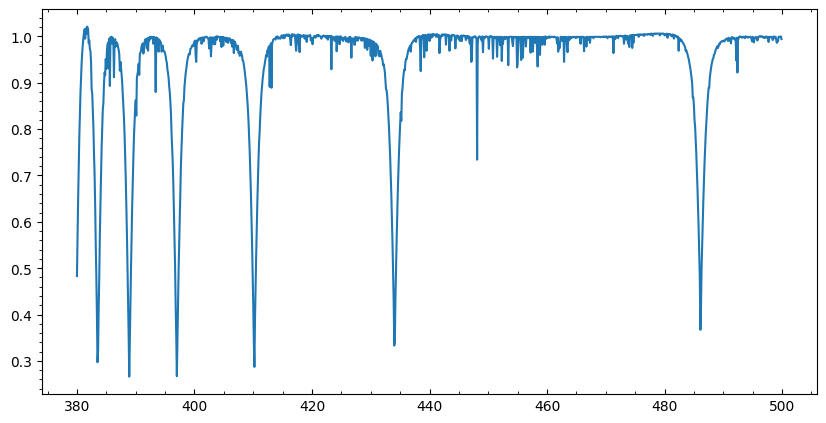

In [ ]:
plt.figure(figsize=(10,5))   # this changes the plot aspect ratio to be wider
plt.minorticks_on()          # shows the minor tick marks
plt.plot(Bstar["wavelength"], Bstar["flux"])
plt.show()

What are the most prominent absorption lines in this spectrum?

\
Answer here:

## Step 3

(a) Read the model spectra for the other spectral type (A, F, G, K, M) into astropy tables.

(b) Copy the cell above and modify it to plot all of the spectral types in the same figure. Make any adjustments you need to for the data to be visible. If you have time, add a legend using *plt.legend()*.

In [ ]:
# Read in the other model spectra
Astar = ascii.read('Astar.csv')
Fstar = ascii.read('Fstar.csv')
Gstar = ascii.read('Gstar.csv')
Kstar = ascii.read('Kstar.csv')
Mstar = ascii.read('Mstar.csv')


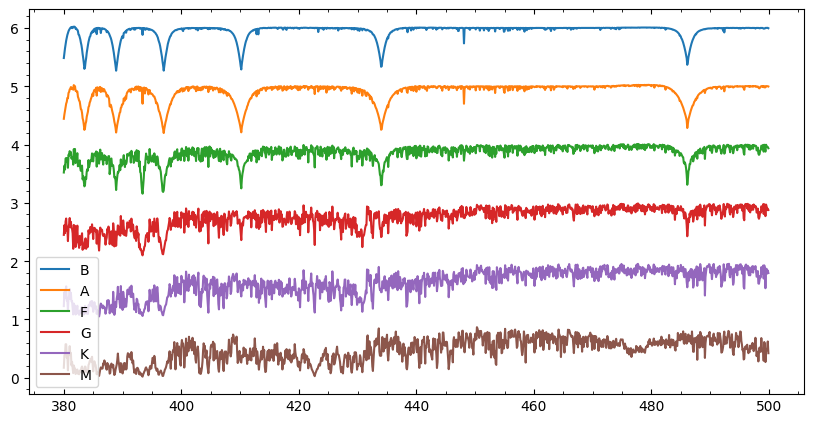

In [ ]:
# Plot all spectral types
plt.figure(figsize=(10,5))   # this changes the plot aspect ratio to be wider
plt.minorticks_on()         # shows the minor tick marks
plt.plot(Bstar["wavelength"], Bstar["flux"]+5, label='B')
plt.plot(Astar["wavelength"], Astar["flux"]+4, label='A')
plt.plot(Fstar["wavelength"], Fstar["flux"]+3, label='F')
plt.plot(Gstar["wavelength"], Gstar["flux"]+2, label='G')
plt.plot(Kstar["wavelength"], Kstar["flux"]+1, label='K')
plt.plot(Mstar["wavelength"], Mstar["flux"], label='M')

plt.legend(loc='lower left')
plt.show()

# Part 2 - observed spectra

In this part, we're going to compare the observed spectra of a real star to the models and determine this star's spectral type.

First, upload all the Star#.csv files to Colab so we can use them. Each Star file lists the wavelength (in nm), normalized flux, and flux error.

Let's start with Star 1...

## Step 4

(a) Read in the spectrum for Star 1 using the *ascii.read()* package. (Like in Step 1).

(b) Plot the spectrum to see what we're dealing with!


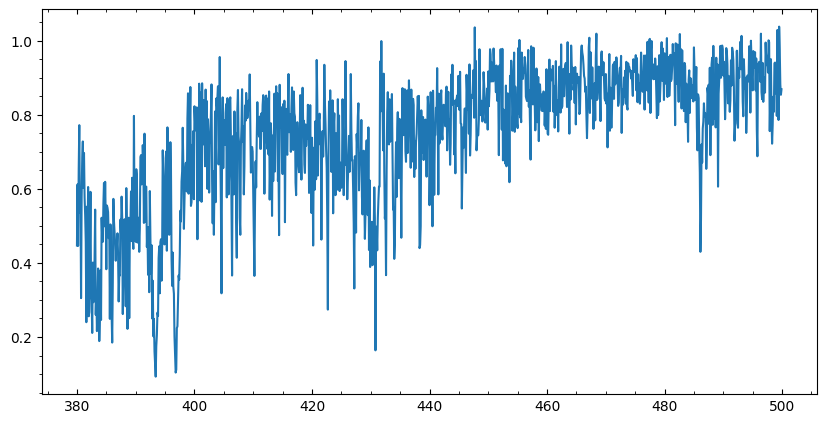

In [ ]:
# Read in data for Star 1
star1 = ascii.read('Star1.csv')

plt.figure(figsize=(10,5))   # this changes the plot aspect ratio to be wider
plt.minorticks_on()          # shows the minor tick marks
plt.plot(star1["wavelength"], star1["flux"])
plt.show()

## Step 5

One way to determine the spectral type of Star 1 would be "by eye", where you visually choose which model looks most similar to Star 1. A better way would be comparing the spectra using a chi-squared ($\chi^2$) goodness-of-fit statistic:
$$\chi^2 = \sum\frac{(data - model)^2}{error^2}$$
This statistic calculates how different two data sets are, so the best fitting model is going to have the *lowest* $\chi^2$ value.

\
Calculate the $\chi^2$ value for Star 1 compared to the B star model. Hint - You can use *np.sum()* to add up all the values in an array.

In [ ]:
# calculate chi2 here
chi2 = np.sum((star1["flux"] - Bstar["flux"])**2 / star1["error"]**2)

print(' chi2 for Star 1 + B star =', chi2)

 chi2 for Star 1 + B star = 252798.7812771234


You should get a $\chi^2$ value of 252,798, which isn't very good. Let's try other spectral types...

Calculate the $\chi^2$ value for the other spectral types (A-M) and print out their values:

In [ ]:
# Chi2 for A star model
chi2 = np.sum((star1["flux"] - Astar["flux"])**2 / star1["error"]**2)
print(' chi2 for Star 1 + A star =', chi2)

# Chi2 for F star model
chi2 = np.sum((star1["flux"] - Fstar["flux"])**2 / star1["error"]**2)
print(' chi2 for Star 1 + F star =', chi2)

# Chi2 for G star model
chi2 = np.sum((star1["flux"] - Gstar["flux"])**2 / star1["error"]**2)
print(' chi2 for Star 1 + G star =', chi2)

# Chi2 for K star model
chi2 = np.sum((star1["flux"] - Kstar["flux"])**2 / star1["error"]**2)
print(' chi2 for Star 1 + K star =', chi2)

# Chi2 for M star model
chi2 = np.sum((star1["flux"] - Mstar["flux"])**2 / star1["error"]**2)
print(' chi2 for Star 1 + M star =', chi2)

 chi2 for Star 1 + A star = 190128.55155107507
 chi2 for Star 1 + F star = 62200.55014936077
 chi2 for Star 1 + G star = 1180.319775985503
 chi2 for Star 1 + K star = 28802.927349276222
 chi2 for Star 1 + M star = 93680.33152131633


What is the spectral type of Star 1?

Answer:

## Step 6

Make a plot of Star 1's spectrum with the best fitting model plotted on top to see how well they match.

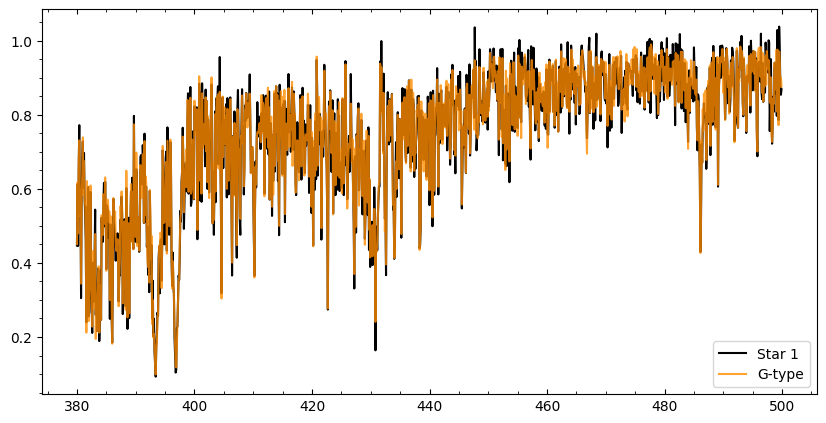

In [ ]:
# make plot here

plt.figure(figsize=(10,5))   # this changes the plot aspect ratio to be wider
plt.minorticks_on()          # shows the minor tick marks
plt.plot(star1["wavelength"], star1["flux"], label='Star 1', color='black')
plt.plot(Gstar["wavelength"], Gstar["flux"], label='G-type', color='darkorange', alpha=0.8)
plt.legend(loc='lower right')
plt.show()

# Part 3 - mystery stars

Repeat the process in Part 2 for the other mystery stars (Stars 2-4) to find their spectral types. For each star,

(a) Read in the mystery star's spectrum.

(b) Compare the observed spectrum to models of different spectral types by calculating the $\chi^2$ values. Find the best fitting spectral type.

(c) Plot the observed spectrum and the best fit
model spectrum to confirm that they match.

## Star 2

 chi2 for Star 2 + B star = 5256.747919309768
 chi2 for Star 2 + A star = 710.6047111962869
 chi2 for Star 2 + F star = 8725.418122458632
 chi2 for Star 2 + G star = 37618.460780780675
 chi2 for Star 2 + K star = 79839.21855935227
 chi2 for Star 2 + M star = 140847.39303049372


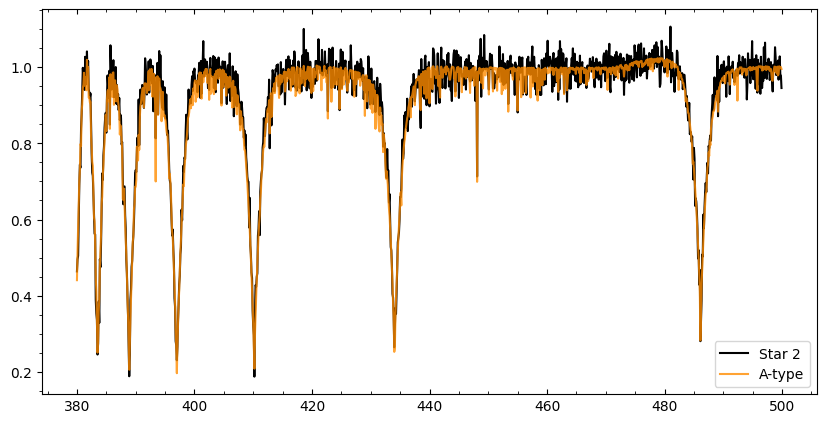

In [ ]:
# Star 2
star2 = ascii.read('Star2.csv')

# Chi2 for B star model
chi2 = np.sum((star2["flux"] - Bstar["flux"])**2 / star2["error"]**2)
print(' chi2 for Star 2 + B star =', chi2)

# Chi2 for A star model
chi2 = np.sum((star2["flux"] - Astar["flux"])**2 / star2["error"]**2)
print(' chi2 for Star 2 + A star =', chi2)

# Chi2 for F star model
chi2 = np.sum((star2["flux"] - Fstar["flux"])**2 / star2["error"]**2)
print(' chi2 for Star 2 + F star =', chi2)

# Chi2 for G star model
chi2 = np.sum((star2["flux"] - Gstar["flux"])**2 / star2["error"]**2)
print(' chi2 for Star 2 + G star =', chi2)

# Chi2 for K star model
chi2 = np.sum((star2["flux"] - Kstar["flux"])**2 / star2["error"]**2)
print(' chi2 for Star 2 + K star =', chi2)

# Chi2 for M star model
chi2 = np.sum((star2["flux"] - Mstar["flux"])**2 / star2["error"]**2)
print(' chi2 for Star 2 + M star =', chi2)

# plot
plt.figure(figsize=(10,5))   # this changes the plot aspect ratio to be wider
plt.minorticks_on()          # shows the minor tick marks
plt.plot(star2["wavelength"], star2["flux"], label='Star 2', color='black')
plt.plot(Astar["wavelength"], Astar["flux"], label='A-type', color='darkorange', alpha=0.8)
plt.legend(loc='lower right')
plt.show()

What is Star 2's spectral type?

Answer:

## Star 3

 chi2 for Star 3 + B star = 21514.01761674682
 chi2 for Star 3 + A star = 12827.992069771746
 chi2 for Star 3 + F star = 1095.4753975959873
 chi2 for Star 3 + G star = 21618.948415643652
 chi2 for Star 3 + K star = 64302.21569090094
 chi2 for Star 3 + M star = 127953.64617648034


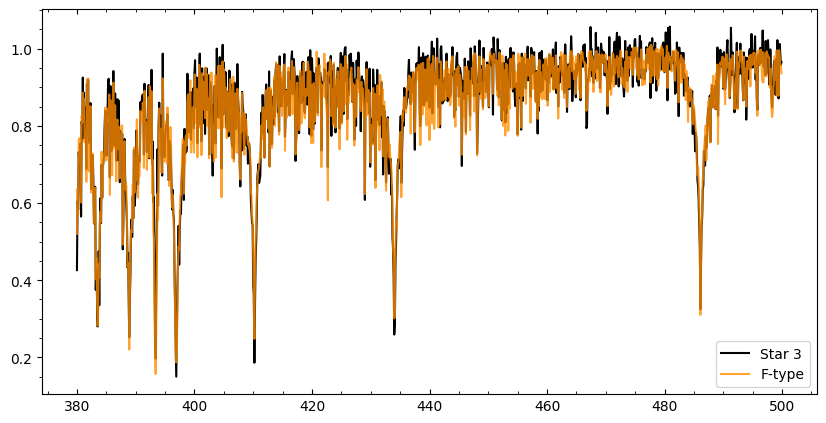

In [ ]:
# Star 3
star3 = ascii.read('Star3.csv')

# Chi2 for B star model
chi2 = np.sum((star3["flux"] - Bstar["flux"])**2 / star3["error"]**2)
print(' chi2 for Star 3 + B star =', chi2)

# Chi2 for A star model
chi2 = np.sum((star3["flux"] - Astar["flux"])**2 / star3["error"]**2)
print(' chi2 for Star 3 + A star =', chi2)

# Chi2 for F star model
chi2 = np.sum((star3["flux"] - Fstar["flux"])**2 / star3["error"]**2)
print(' chi2 for Star 3 + F star =', chi2)

# Chi2 for G star model
chi2 = np.sum((star3["flux"] - Gstar["flux"])**2 / star3["error"]**2)
print(' chi2 for Star 3 + G star =', chi2)

# Chi2 for K star model
chi2 = np.sum((star3["flux"] - Kstar["flux"])**2 / star3["error"]**2)
print(' chi2 for Star 3 + K star =', chi2)

# Chi2 for M star model
chi2 = np.sum((star3["flux"] - Mstar["flux"])**2 / star3["error"]**2)
print(' chi2 for Star 3 + M star =', chi2)

# plot
plt.figure(figsize=(10,5))   # this changes the plot aspect ratio to be wider
plt.minorticks_on()          # shows the minor tick marks
plt.plot(star3["wavelength"], star3["flux"], label='Star 3', color='black')
plt.plot(Fstar["wavelength"], Fstar["flux"], label='F-type', color='darkorange', alpha=0.8)
plt.legend(loc='lower right')
plt.show()


What is Star 3's spectral type?

Answer:

## Star 4

 chi2 for Star 4 + B star = 4781697.057868845
 chi2 for Star 4 + A star = 3922156.2905765222
 chi2 for Star 4 + F star = 1602405.3895682765
 chi2 for Star 4 + G star = 334915.31202450226
 chi2 for Star 4 + K star = 33791.979879990955
 chi2 for Star 4 + M star = 45592.63581940545


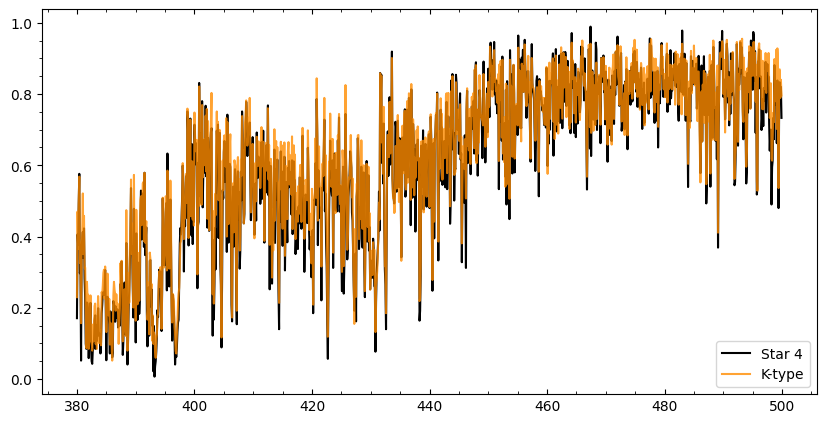

In [ ]:
# Star 4
star4 = ascii.read('Star4.csv')

# Chi2 for B star model
chi2 = np.sum((star4["flux"] - Bstar["flux"])**2 / star4["error"]**2)
print(' chi2 for Star 4 + B star =', chi2)

# Chi2 for A star model
chi2 = np.sum((star4["flux"] - Astar["flux"])**2 / star4["error"]**2)
print(' chi2 for Star 4 + A star =', chi2)

# Chi2 for F star model
chi2 = np.sum((star4["flux"] - Fstar["flux"])**2 / star4["error"]**2)
print(' chi2 for Star 4 + F star =', chi2)

# Chi2 for G star model
chi2 = np.sum((star4["flux"] - Gstar["flux"])**2 / star4["error"]**2)
print(' chi2 for Star 4 + G star =', chi2)

# Chi2 for K star model
chi2 = np.sum((star4["flux"] - Kstar["flux"])**2 / star4["error"]**2)
print(' chi2 for Star 4 + K star =', chi2)

# Chi2 for M star model
chi2 = np.sum((star4["flux"] - Mstar["flux"])**2 / star4["error"]**2)
print(' chi2 for Star 4 + M star =', chi2)

# plot
plt.figure(figsize=(10,5))   # this changes the plot aspect ratio to be wider
plt.minorticks_on()          # shows the minor tick marks
plt.plot(star4["wavelength"], star4["flux"], label='Star 4', color='black')
plt.plot(Kstar["wavelength"], Kstar["flux"], label='K-type', color='darkorange', alpha=0.8)
plt.legend(loc='lower right')
plt.show()


What is Star 4's spectral type?

Answer:


---

## Final instructions
Finish any remaining exercises, then **send me your notebook by Nov 14** to get participation credit. You can download your notebook as an ".ipynb" file and email it, or share the notebook with me through google drive.

\
Remember to answer the questions in Steps 2,6, and 7.

\
If you're finishing the activity at home and run into python problems, don't worry about getting the code exactly right. This isn't a coding class and I'm not grading you on how well you know python. If you're stuck, add a text box and explain what you're trying to do *in words*. Then I'll know you have the right idea and know how to apply the content, even if the python code itself is not working. You're also welcome to stop by my office to ask coding questions anytime!